In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy import stats
from matplotlib.pyplot import figure

In [35]:
import os
os.getcwd()
os.chdir('C:\\Users\\vaorc\\Documents\\MSC COGNITIVE SCIENCE\\THESIS_FINAL_REMODELADA\\THESIS')
os.getcwd()

'C:\\Users\\vaorc\\Documents\\MSC COGNITIVE SCIENCE\\THESIS_FINAL_REMODELADA\\THESIS'

In [36]:
no_ff = {}
ff = {}
num_simulations = 34

#Fill x with the results from 50 simulations on both single and multiple drive conditions
for i in range(num_simulations):
    csv_filename = 'Results/NoFF/noff_test'+str(i+1) +'.csv' 
    no_ff["data{0}".format(i)] = pd.read_csv(csv_filename)
    csv_filename = 'Results/FF/doubleFF'+str(i+1) +'.csv'
    ff["data{0}".format(i)] = pd.read_csv(csv_filename)

In [37]:
simulations= len(no_ff)
timesteps= no_ff['data0'].shape[0]

In [38]:
print('Number of simulations = ' + str(simulations))
print('Number of columns = ' + str(no_ff['data0'].shape[1]))
print('Number of timesteps = ' + str(timesteps))
print('Column names = ' + str(no_ff['data0'].columns))

Number of simulations = 34
Number of columns = 11
Number of timesteps = 90000
Column names = Index(['Xposition', 'Yposition', 'aVtemperature', 'aVthirst', 'DriveTemp',
       'DriveThirst', 'TFtemperature', 'TFthirst', 'Temperature_error',
       'Thirst_error', 'Grad_Temp'],
      dtype='object')


In [39]:
#Return average value of 50 simulations from a selected column and its average standard deviation
def mean_values(dataframe,column_name):
    values = []
    for i in range(simulations):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name][column_name]
        values.append(data)
    values = np.array(values)
    average_values = np.mean(values, axis=0)
    std_values = np.std(values, axis= 0)
    print(len(average_values))
    
    return average_values,std_values

In [53]:
#Average value of external temperature
noffmean_externaltemp , noffstd_externaltemp = mean_values(no_ff, 'Grad_Temp')

#Desired value 
desired_value = np.full((90000,1),1)


90000


In [45]:
#Average values for thirst and temperature when no feedforward was added
noffmean_thirst, noffstd_thirst = mean_values(no_ff,'aVthirst')
noffmean_temperature, noffstd_temperature =  mean_values(no_ff,'aVtemperature')

90000
90000


In [46]:
#Average values for thirst and temperature when two feedforward were added
ffmean_temperature, ffstd_temperature =  mean_values(ff,'aVtemperature')
ffmean_thirst, ffstd_thirst =  mean_values(ff,'aVthirst')

90000
90000


## RESULTS FROM MULTIPLE DRIVE PREDICTION 

### THIRST & TEMPERATURE BEHAVIOR ACROSS THE SIMULATION <br>
The graphic below represents the behavior of thirst and temperature when both were under the feedforward condition in purple compared to the non-feedforward condition in gray. <br>The desired value is represented by a dotted black line constant at one and the external temperature is also represented by a dotted line with sinusoidal shape.

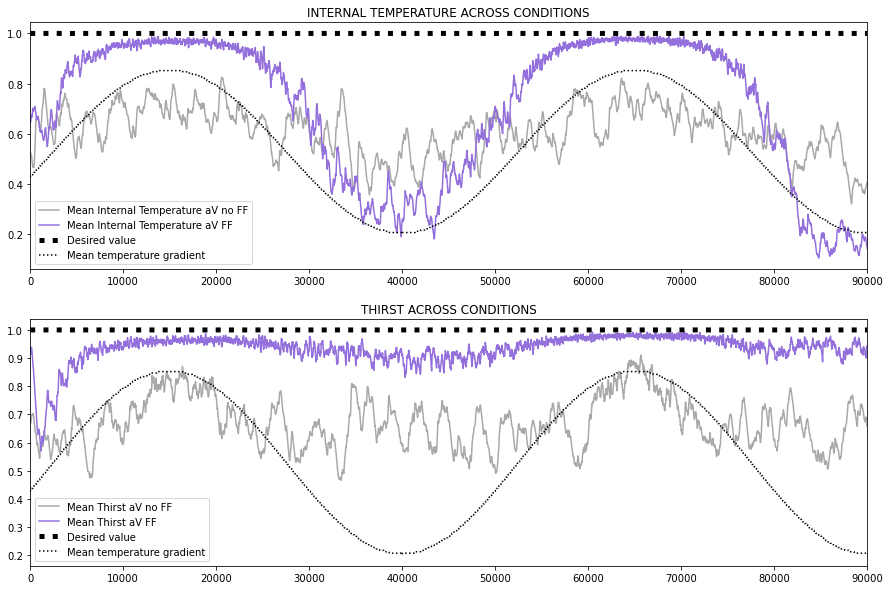

In [58]:
fig,ax = plt.subplots(nrows= 2, ncols= 1, figsize=(15,10))

ax[0].plot(noffmean_temperature, label='Mean Internal Temperature aV no FF', color="darkgray")
ax[0].plot(ffmean_temperature, label='Mean Internal Temperature aV FF', color="mediumpurple")
ax[0].plot(desired_value,label = 'Desired value', linewidth = 5, color="black", linestyle = "dotted")
ax[0].plot(noffmean_externaltemp,label='Mean temperature gradient', color="black",linestyle = "dotted")
ax[0].set_xlim(0,90000)
ax[0].set_title("INTERNAL TEMPERATURE ACROSS CONDITIONS")
ax[0].legend(frameon= True, loc = 'lower left')


ax[1].plot(noffmean_thirst,label = 'Mean Thirst aV no FF', color="darkgray")
ax[1].plot(ffmean_thirst, label='Mean Thirst aV FF ', color="mediumpurple")
ax[1].plot(desired_value,label = 'Desired value', linewidth = 5, color="black",linestyle = "dotted")
ax[1].plot(noffmean_externaltemp,label='Mean temperature gradient', color="black",linestyle = "dotted")
ax[1].set_xlim(0,90000)
ax[1].set_title("THIRST ACROSS CONDITIONS")
ax[1].legend(frameon= True, loc = 'lower left')


plt.show()


### ERROR FOR THIRST AND TEMPERATURE ACROSS THE SIMULATION <br>
 Graphs below represent the average error (1-actual_value) of thirst and temperature across the simulation when under the feedforward condition, compared to the non-feedforward condition.

In [55]:
#Average values of error(1-actual_value) for temperature without the feedforward controller.
noffmean_errortemp, noffstd_errortemp = mean_values(no_ff,'Temperature_error')
#Average values of error(1-actual_value) for temperature with the feedforward controller.
ffmean_errortemp, ffstd_errortemp = mean_values(ff, 'Temperature_error')

#Average values of error(1-actual_value) for thirst without the feedforward controller.
noffmean_errorthirst, noffstd_errorthirst = mean_values(no_ff,'Thirst_error')
#Average values of error(1-actual_value) for thirst with the feedforward controller.
ffmean_errortthirst, ffstd_errorthirst = mean_values(ff, 'Thirst_error')


90000
90000
90000
90000


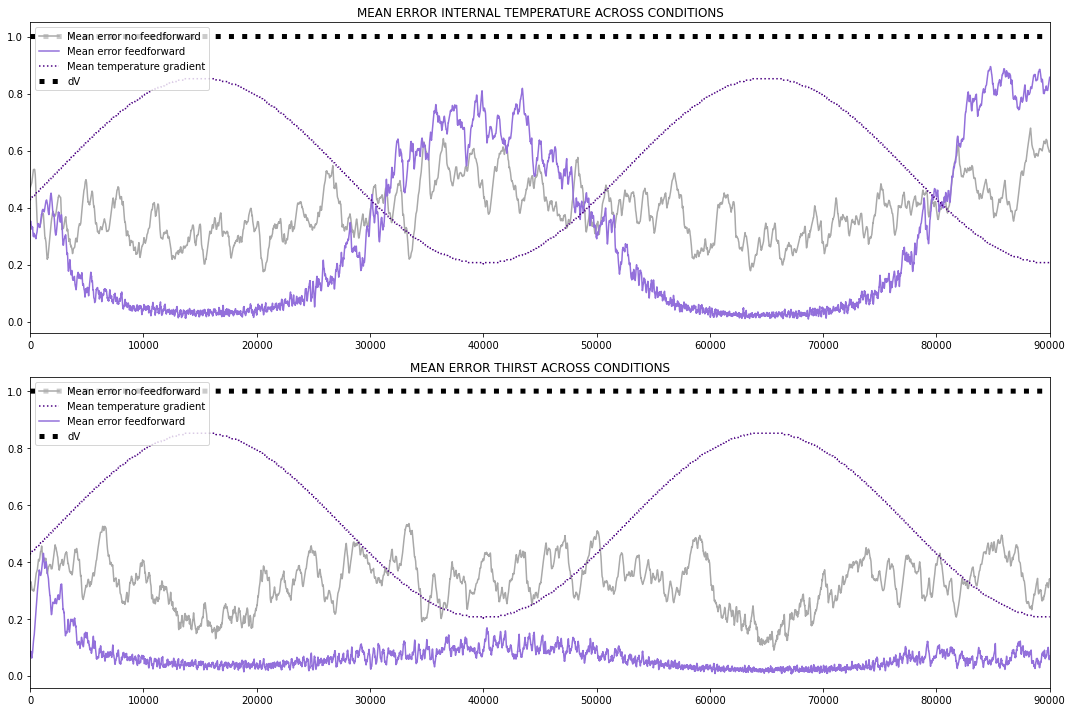

In [57]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,figsize=(15,10))
ax[0].plot(noffmean_errortemp, label='Mean error no feedforward', color="darkgray")
ax[0].plot(ffmean_errortemp,label='Mean error feedforward', color="mediumpurple")
ax[0].plot(noffmean_externaltemp,label='Mean temperature gradient', color="indigo",linestyle = "dotted")
ax[0].plot(desired_value, label ='dV',linewidth =5,  color = 'black',linestyle = "dotted")
ax[0].set_title('MEAN ERROR INTERNAL TEMPERATURE ACROSS CONDITIONS')
ax[0].set_xlim(0,90000)
ax[0].legend(frameon= True, loc = 'upper left')

ax[1].plot(noffmean_errorthirst, label='Mean error no feedforward', color="darkgray")
ax[1].plot(noffmean_externaltemp,label='Mean temperature gradient', color="indigo",linestyle = "dotted")
ax[1].plot(ffmean_errortthirst,label='Mean error feedforward', color="mediumpurple")
ax[1].plot(desired_value, label ='dV',linewidth =5,  color = 'black',linestyle = "dotted")
ax[1].set_title('MEAN ERROR THIRST ACROSS CONDITIONS')
ax[1].legend(frameon= True, loc = 'upper left')
ax[1].set_xlim(0,90000)
plt.tight_layout()

In [59]:
totalerrortemp_noff = np.mean(noffmean_errortemp)
totalerrortemp_ff = np.mean(ffmean_errortemp)
print(f'Mean value of internal temp error in no ff condition was: {totalerrortemp_noff} vs the ff condition, which was {totalerrortemp_ff}')

min_errortemp_noff = noffmean_errortemp.max()
min_errortemp_ff = ffmean_errortemp.max()
print(f'Max value of internal temp error in no ff condition was: {min_errortemp_noff} vs the ff condition, which was {min_errortemp_ff}')

total_std_error_noff = np.std(noffmean_errortemp)
total_std_error_ff =np.std(ffmean_errortemp)
print(f'Standard deviation value of temperature error in no ff condition was: {total_std_error_noff} vs the ff condition, which was {total_std_error_ff}')

Mean value of internal temp error in no ff condition was: 0.3881032562091504 vs the ff condition, which was 0.2882764385620916
Max value of internal temp error in no ff condition was: 0.6788235294117648 vs the ff condition, which was 0.8947352941176472
Standard deviation value of temperature error in no ff condition was: 0.09842676736344924 vs the ff condition, which was 0.27714268764673256


### DECISION MAKING LAYER BEHAVIOR OR ATTRACTOR DINAMICS: <br>
The following results represent the behavior of the attractors when adding a feedforward for each condition (thirst and temperature). 

In [40]:
#Values of the external temperature
noffmean_externaltemp, noffstd_temperature= mean_values(no_ff,'Grad_Temp')
#Values of mean thirst and temperature
mean_a_thirst, std_a_thirst = mean_values(ff,'TFthirst')
mean_a_temp, std_a_temp = mean_values(ff,'TFtemperature')

90000
90000
90000


In [32]:
def attractor_behavior(dataframe):
    plt.figure(figsize=(10,10))
    plt.suptitle("BEHAVIOR OF DECISION MAKING LAYER IN 3 DIFFERENT SIMULATIONS", fontsize=20)
    for i in range(3):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        thirst = data["TFthirst"]
        temp = data["TFtemperature"]
        plt.subplot(3, 1, i+1)
        plt.plot(temp, linewidth = 1, color = 'gray', alpha = 0.5, label ="Temperature attractor")
        plt.plot(thirst, linewidth = 1, color ="mediumpurple", label ="Thirst attractor")
        plt.plot(noffmean_externaltemp,linestyle ="dotted", color = 'black')
        plt.xlim(35000,50000)
        plt.legend(frameon= True, loc = 'upper left')
    plt.tight_layout()

Since the behavior of the decision making layer reflects high competition between thirst and temperature the visualization of the 90000 timesteps is unclear. <br>To clearly portray the competitive behavior between thirst and temperature the timesteps between 35000 and 50000 were chosen. However, the behavior shown below is similar regardless of the timesteps chosen and it can be seen across the simulations.

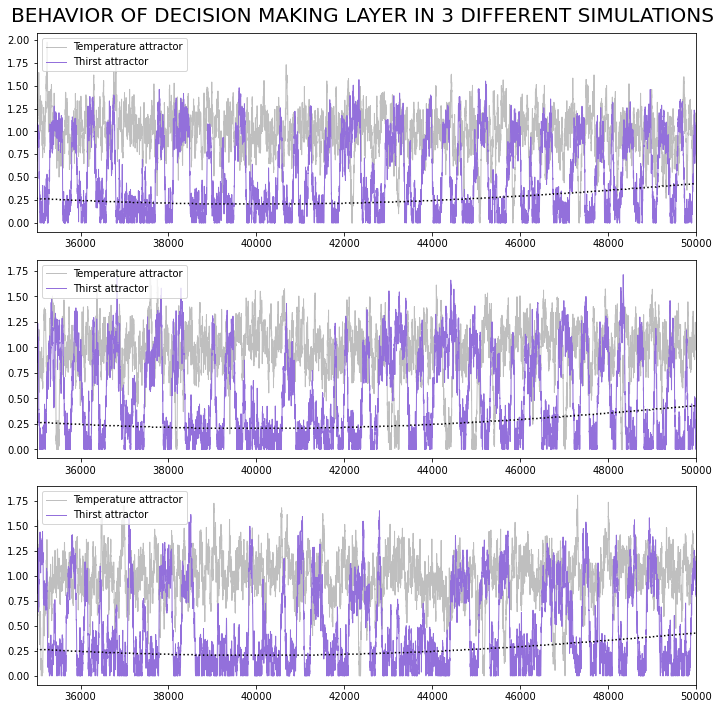

In [43]:
attractor_behavior(ff)

# ATTRACTOR FEED WITH RAW ERROR TWO FF CONTROLLERS

In [41]:
"""smooth_error_mean, smooth_error_std = mean_values(ff,'Smooth_error_temp')
mean_temp, mean_temp_std = mean_values(ff,'Grad_Temp')
output, output_std = mean_values(ff,'Output')"""

"smooth_error_mean, smooth_error_std = mean_values(ff,'Smooth_error_temp')\nmean_temp, mean_temp_std = mean_values(ff,'Grad_Temp')\noutput, output_std = mean_values(ff,'Output')"

# EVALUATION METRICS 


### Average internal temperature for non-predictive VS predictive model 
Average internal temperature is the sum of the values within aV_internal_temp_list,a list that contains the aV(actual value) of internal temperature of the agent over the 100.000 episodes of the simulation, divided by the number of episodes.

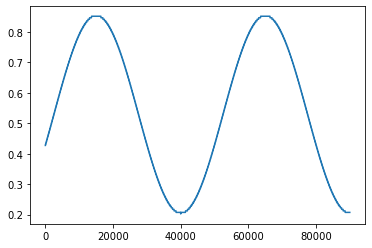

In [ ]:
plt.plot(noffmean_externaltemp)

In [ ]:
noffmean_thirsterr, noffstd_thirsterr =  mean_values(no_ff,'Thirst_error')
noffmean_temperr, noffstd_temprr =  mean_values(no_ff,'Temperature_error')


90000
90000


In [ ]:
np.mean(noffmean_thirsterr)

0.32183118177777786

## FF BEHAVIOR FOR BOTH CONDITIONS

In [ ]:
mean_output_temp, std_output_temp = mean_values(ff,'Output')
mean_output_thirst, std_output_thirst = mean_values(ff,'Output_thirst')
fferror_mean_temp, error_std_temp= mean_values(ff,'Temperature_error')
fferror_mean_thirst, error_std_thirst = mean_values(ff,'Thirst_error')
nofferror_mean_temp, error_std_temp= mean_values(no_ff,'Temperature_error')
nofferror_mean_thirst, error_std_thirst = mean_values(no_ff,'Thirst_error')


90000
90000
90000
90000
90000
90000


In [ ]:
noff_total_av = (np.mean(nofferror_mean_temp+ nofferror_mean_thirst))
ff_total_av = (np.mean(fferror_mean_temp+ fferror_mean_thirst))

noff_total_av,ff_total_av

(0.7186872540000001, 0.3550908824444446)

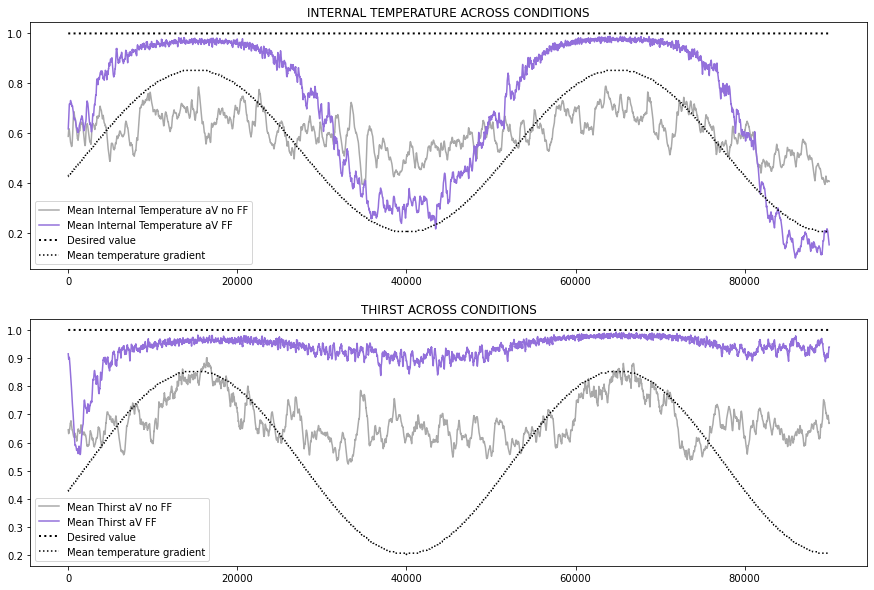

In [ ]:
fig,ax = plt.subplots(nrows= 2, ncols= 1, figsize=(15,10))

ax[0].plot(noffmean_temperature, label='Mean Internal Temperature aV no FF', color="darkgray")
ax[0].plot(ffmean_temperature, label='Mean Internal Temperature aV FF', color="mediumpurple")
ax[0].plot(desired_value_temp,label = 'Desired value', linewidth = 2, color="black", linestyle = "dotted")
ax[0].plot(noffmean_externaltemp,label='Mean temperature gradient', color="black",linestyle = "dotted")
#ax[0].set_xlim(0,90000)
ax[0].set_title("INTERNAL TEMPERATURE ACROSS CONDITIONS")
ax[0].legend(frameon= True, loc = 'lower left')


ax[1].plot(noffmean_thirst,label = 'Mean Thirst aV no FF', color="darkgray")
ax[1].plot(ffmean_thirst, label='Mean Thirst aV FF ', color="mediumpurple")
ax[1].plot(desired_value_temp,label = 'Desired value', linewidth = 2, color="black",linestyle = "dotted")
ax[1].plot(noffmean_externaltemp,label='Mean temperature gradient', color="black",linestyle = "dotted")
#ax[1].set_xlim(0,90000)
ax[1].set_title("THIRST ACROSS CONDITIONS")
ax[1].legend(frameon= True, loc = 'lower left')


plt.show()

In [ ]:
def plot_outputff(mean_output_temp,mean_output_thirst,error_mean_temp,error_mean_thirst):
    fig, ax = plt.subplots(nrows= 4, ncols= 1,figsize=(15,10))
    ax[0].plot(mean_output_temp, label='Output ff controller temperature', linewidth=2, linestyle='--')
    ax[0].set_title('TEMPERATURE FEEDFORWARD BEHAVIOR')
    ax[0].set_ylabel('Values')
    ax[0].legend(frameon=False)
    
    ax[1].plot(error_mean_temp, label='Temperature error', linewidth=2, linestyle='--')
    ax[1].set_ylabel('Values')
    ax[1].set_title('TEMPERATURE ERROR')

    ax[2].plot(mean_output_thirst, label= 'Output ff controller thirst', linewidth=2, linestyle='--')
    ax[2].set_title('THIRST FEEDFORWARD BEHAVIOR')
    ax[2].set_ylabel('Values')
    ax[2].legend(frameon=False)

    ax[3].plot(error_mean_thirst, label='Thirst error', linewidth=2, linestyle='--')
    ax[3].set_title('THIRST ERROR')
    ax[3].set_ylabel('Values')


    plt.tight_layout()

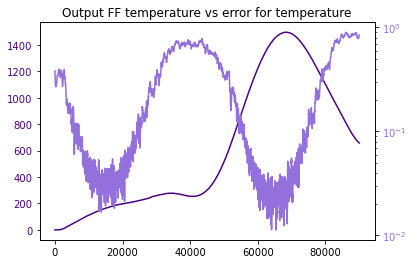

In [ ]:
fig, ax = plt.subplots()

# Plot linear sequence, and set tick labels to the same color
ax.plot(mean_output_temp, color='indigo')
ax.set_title('Output FF temperature vs error for temperature')
ax.plot
ax.tick_params(axis='y', labelcolor='indigo')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(fferror_mean_temp,color='mediumpurple')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='mediumpurple')
ax2.set_xlabel('Timesteps')

plt.show()

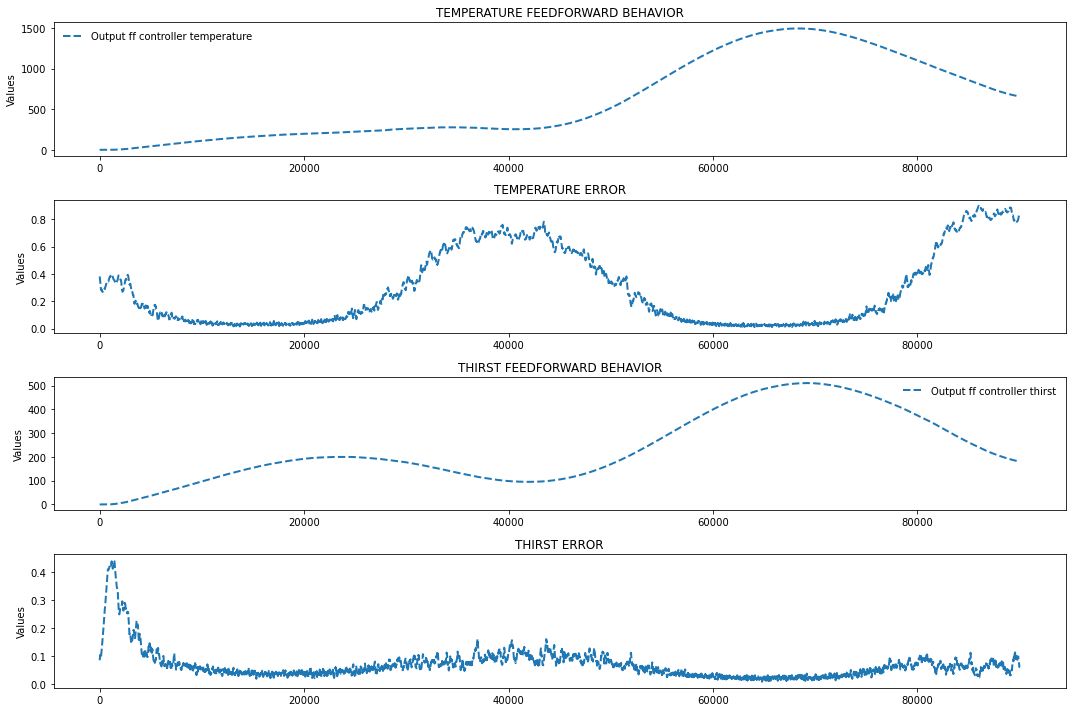

In [ ]:
plot_outputff(mean_output_temp,mean_output_thirst,fferror_mean_temp,fferror_mean_thirst)

In [ ]:
total_average_noff = np.mean(noffmean_temperature)
total_average_ff = np.mean(ffmean_temperature)
print(f'Total average of internal temperature for no ff condition was: {total_average_noff} vs the ff condition, which was {total_average_ff}\n')

min_average_noff = noffmean_temperature.min()
min_average_ff =ffmean_temperature.min()
print(f'Min value of  internal temperature no ff condition was: {min_average_noff} vs the ff condition, which was {min_average_ff}\n')

total_std_noff = np.std(noffmean_temperature)
total_std_ff =np.std(ffmean_temperature)
print(f'Standard deviation value of  internal temperature no ff condition was: {total_std_noff} vs the ff condition, which was {total_std_ff}\n')
total_average_thirst_noff = np.mean(noffmean_thirst)
total_average_thirst_ff = np.mean(ffmean_thirst)
print(f'Total average of thirst for no ff condition was: {total_average_thirst_noff} vs the ff condition, which was {total_average_thirst_ff}\n')

min_average_thirst_noff = noffmean_thirst.min()
min_average_thirst_ff = ffmean_thirst.min()
print(f'Min value of  thirst no ff condition was: {min_average_thirst_noff} vs the ff condition, which was {min_average_thirst_ff}\n')

total_std_thirst_noff = np.std(noffmean_thirst)
total_std_thirst_ff =np.std(ffmean_thirst)
print(f'Standard deviation value of  thirst no ff condition was: {total_std_thirst_noff} vs the ff condition, which was {total_std_thirst_ff}\n')

Total average of internal temperature for no ff condition was: 0.6031439277777777 vs the ff condition, which was 0.7124842931111111

Min value of  internal temperature no ff condition was: 0.39499999999999985 vs the ff condition, which was 0.10051999999999989

Standard deviation value of  internal temperature no ff condition was: 0.07978578363308778 vs the ff condition, which was 0.2760612068093119

Total average of thirst for no ff condition was: 0.6781688182222221 vs the ff condition, which was 0.9324248244444445

Min value of  thirst no ff condition was: 0.5234199999999999 vs the ff condition, which was 0.5572999999999999

Standard deviation value of  thirst no ff condition was: 0.08026031469362026 vs the ff condition, which was 0.05579431274980021



# ERROR

In [ ]:
noffmean_errortemp, noffstd_errortemp = mean_values(no_ff,'Temperature_error')
ffmean_errortemp, ffstd_errortemp = mean_values(ff, 'Temperature_error')
desired_value = np.full((90000,1),0)

noffmean_errorthirst, noffstd_errorthirst = mean_values(no_ff,'Thirst_error')
ffmean_errortthirst, ffstd_errorthirst = mean_values(ff, 'Thirst_error')

90000
90000
90000
90000


## Temperature Error

In [ ]:
totalerrortemp_noff = np.mean(noffmean_errortemp)
totalerrortemp_ff = np.mean(ffmean_errortemp)
print(f'Mean value of internal temp error in no ff condition was: {totalerrortemp_noff} vs the ff condition, which was {totalerrortemp_ff}')

min_errortemp_noff = noffmean_errortemp.max()
min_errortemp_ff = ffmean_errortemp.max()
print(f'Max value of internal temp error in no ff condition was: {min_errortemp_noff} vs the ff condition, which was {min_errortemp_ff}')

total_std_error_noff = np.std(noffmean_errortemp)
total_std_error_ff =np.std(ffmean_errortemp)
print(f'Standard deviation value of temperature error in no ff condition was: {total_std_error_noff} vs the ff condition, which was {total_std_error_ff}')

Mean value of internal temp error in no ff condition was: 0.39685607222222236 vs the ff condition, which was 0.28751570688888894
Max value of internal temp error in no ff condition was: 0.6050000000000001 vs the ff condition, which was 0.8994800000000001
Standard deviation value of temperature error in no ff condition was: 0.07978578363308778 vs the ff condition, which was 0.2760612068093119


In [ ]:
totalerror_noff = np.mean(abs(noffmean_errortemp+noffmean_errorthirst))
totalerror_ff = np.mean(abs(ffmean_errortemp+ffmean_errortthirst))
print(f'Total average of temperature and thirst error for no ff condition was: {totalerror_noff} vs the ff condition, which was {totalerror_ff}')

Total average of temperature and thirst error for no ff condition was: 0.7186872540000001 vs the ff condition, which was 0.3550908824444446


[Text(0.5, 1.0, 'DISTRIBUTION OF THIRST ERROR WITHOUT FF CONTROLLER'),
 Text(0.5, 0, 'Error')]

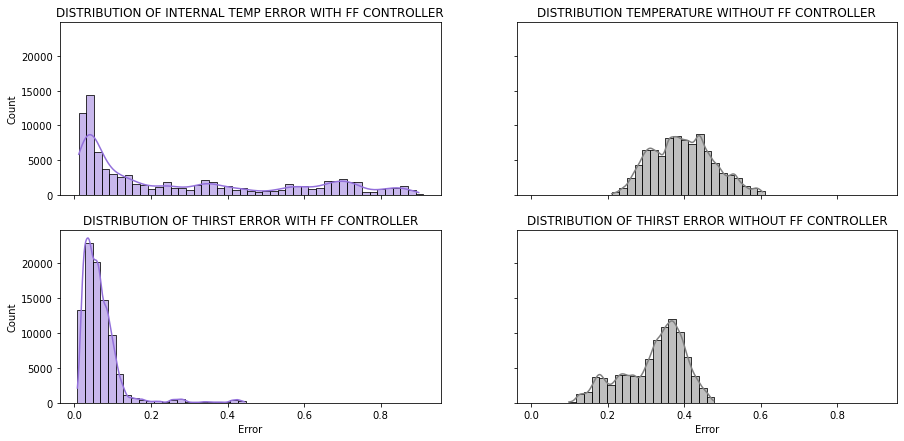

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols= 2,figsize=(15, 7),sharey=True, sharex = True)
sns.histplot(ffmean_errortemp, bins = 50, binwidth= 0.02, kde= True, ax = axes[0][0], color ="mediumpurple" ).set(title='DISTRIBUTION OF INTERNAL TEMP ERROR WITH FF CONTROLLER')
sns.histplot(noffmean_errortemp, bins=50, binwidth= 0.02,kde= True, ax = axes[0][1],  color ="gray").set(title='DISTRIBUTION TEMPERATURE WITHOUT FF CONTROLLER')
sns.histplot(ffmean_errortthirst, bins =50, binwidth= 0.02,kde= True, ax = axes[1][0], color ="mediumpurple" ).set(title='DISTRIBUTION OF THIRST ERROR WITH FF CONTROLLER',xlabel="Error")
sns.histplot(noffmean_thirsterr, bins=50, binwidth= 0.02,kde= True, ax = axes[1][1], color ="gray").set(title='DISTRIBUTION OF THIRST ERROR WITHOUT FF CONTROLLER',xlabel="Error")
#plt.xlim()

In [ ]:
totalerror_noff = abs(noffmean_errortemp+noffmean_errorthirst)
totalerror_ff = abs(ffmean_errortemp+ffmean_errortthirst)

In [ ]:
noffmean_errortemp, noffstd_errortemp = mean_values(no_ff,'Temperature_error')
ffmean_errortemp, ffstd_errortemp = mean_values(ff, 'Temperature_error')
desired_value = np.full((90000,1),0)

noffmean_errorthirst, noffstd_errorthirst = mean_values(no_ff,'Thirst_error')
ffmean_errortthirst, ffstd_errorthirst = mean_values(ff, 'Thirst_error')

90000
90000
90000
90000


(array([ 1381.,  4148.,  6381.,  7145.,  7080., 11612., 19435., 20594.,
         9362.,  2862.]),
 array([0.09882 , 0.136596, 0.174372, 0.212148, 0.249924, 0.2877  ,
        0.325476, 0.363252, 0.401028, 0.438804, 0.47658 ]),
 <BarContainer object of 10 artists>)

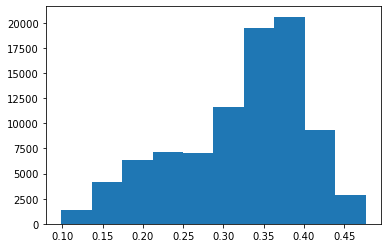

In [ ]:
plt.hist(noffmean_errorthirst)

In [ ]:
t_statistic =stats.ttest_ind(noffmean_errortemp,ffmean_errortemp, alternative ='greater')
print(f'the results of t test is: {t_statistic}')

the results of t test is: Ttest_indResult(statistic=114.14939018101556, pvalue=0.0)


In [ ]:
t_statistic_thirst =stats.ttest_ind(noffmean_errorthirst,ffmean_errortthirst, alternative= 'greater')
print(f'the results of t test is: {t_statistic}')

the results of t test is: Ttest_indResult(statistic=114.14939018101556, pvalue=0.0)


## Thirst error

In [ ]:
totalerrorthirst_noff = np.mean(noffmean_errorthirst)
totalerrorthirst_ff = np.mean(ffmean_errortthirst)
print(f'Mean value of internal thirst error in no ff condition was: {totalerrorthirst_noff} vs the ff condition, which was {totalerrorthirst_ff}')

min_errorthirst_noff = noffmean_errorthirst.max()
min_errorthirst_ff = ffmean_errortthirst.max()
print(f'Max value of internal temp error in no ff condition was: {min_errorthirst_noff} vs the ff condition, which was {min_errorthirst_ff}')

total_std_errorthirst_noff = np.std(noffmean_errorthirst)
total_std_errorthirst_ff =np.std(ffmean_errortthirst)
print(f'Standard deviation value of temperature error in no ff condition was: {total_std_errorthirst_noff} vs the ff condition, which was {total_std_errorthirst_ff}')

Mean value of internal thirst error in no ff condition was: 0.32183118177777786 vs the ff condition, which was 0.06757517555555559
Max value of internal temp error in no ff condition was: 0.47658000000000006 vs the ff condition, which was 0.4427000000000001
Standard deviation value of temperature error in no ff condition was: 0.08026031469362026 vs the ff condition, which was 0.05579431274980019


In [ ]:
totalerrorthirst_noff = np.mean(abs(noffmean_errorthirst))
totalerrorthirst_ff = np.mean(abs(ffmean_errortthirst))
print(f'Total average of thirst error for no ff condition was: {totalerrorthirst_noff} vs the ff condition, which was {totalerrorthirst_ff}')

Total average of thirst error for no ff condition was: 0.32183118177777786 vs the ff condition, which was 0.06757517555555559


In [ ]:
labels = ['noff','ff']
values = [totalerrorthirst_noff,totalerrorthirst_ff]
error = [total_std_errorthirst_noff,total_std_errorthirst_ff]

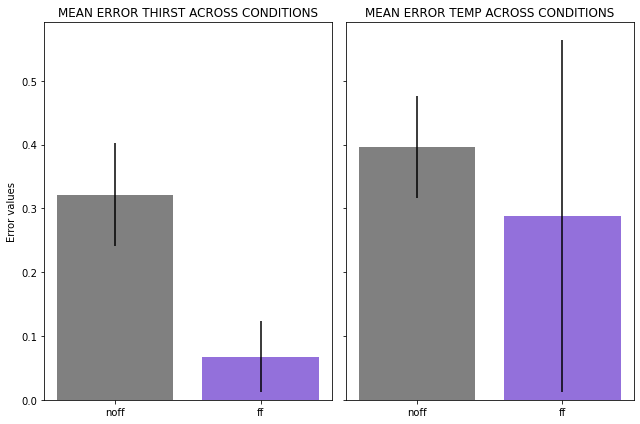

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols= 2,figsize=(9,6),sharey=True)

ax[0].bar(labels,values, yerr=error,color =['gray','mediumpurple'])
ax[0].set_title('MEAN ERROR THIRST ACROSS CONDITIONS')
ax[0].set_ylabel('Error values')



ax[1].bar(labels, [totalerrortemp_noff,totalerrortemp_ff],  yerr=[total_std_error_noff,total_std_error_ff], color =['gray','mediumpurple' ])
ax[1].set_title('MEAN ERROR TEMP ACROSS CONDITIONS')

plt.tight_layout()

In [ ]:
print(f"error temp no ff {np.mean(nofferror_mean_temp)}")
print(f"error temp  ff {np.mean(fferror_mean_temp)}")

print(f"error thirst no ff {np.mean(nofferror_mean_thirst)}")
print(f"error thirst ff {np.mean(fferror_mean_thirst)}")

total_err_noff = np.mean(nofferror_mean_temp)+np.mean(nofferror_mean_thirst)
total_err_noff

total_err_ff =np.mean(fferror_mean_temp)+np.mean(fferror_mean_thirst)
print(f"err no ff {total_err_noff} vs err ff {total_err_ff}")

error temp no ff 0.39685607222222236
error temp  ff 0.28751570688888894
error thirst no ff 0.32183118177777786
error thirst ff 0.06757517555555559
err no ff 0.7186872540000002 vs err ff 0.35509088244444453


# TRAJECTORY

In [ ]:
Xpose_av, Xpose_std = mean_values(ff, 'Xposition')
Ypose, Ypose_std = mean_values(ff,'Yposition')

90000
90000


In [ ]:
def map_plot(dataframe):
    plt.figure(figsize=(15,10))
    plt.title('Heat map of agent in 50 tests')
    for i in range(50):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[10000:25000, 'Xposition']  # is a valid integer index and NAME is the name of the column.
        y = data.loc[10000:25000,'Yposition']
        #x = data['Xposition']#[(data['Grad_Temp']>0.4)]
        #y = data['Yposition']#[(data['Grad_Temp']>0.4)]
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(10, 5, i+1)
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 350,aspect= 'auto',interpolation='nearest')

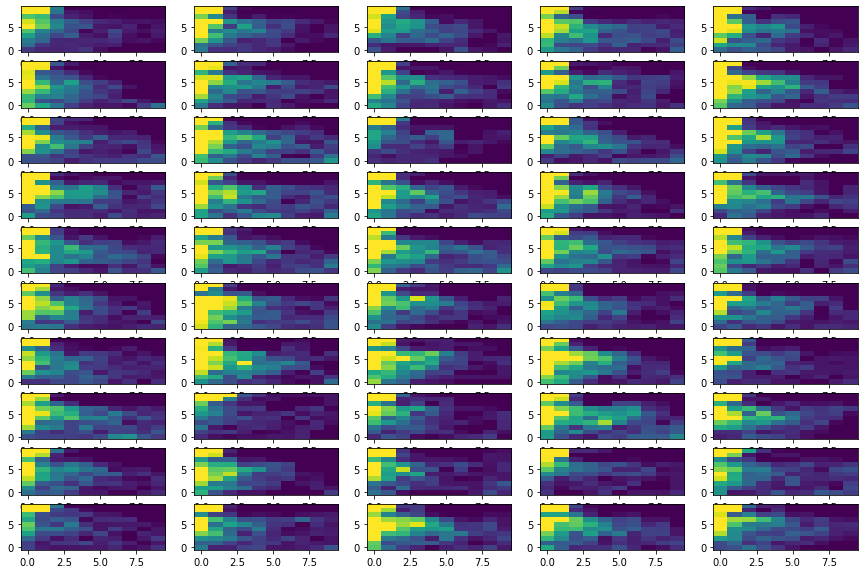

In [ ]:
map_plot(no_ff)

In [ ]:
def map_plot(dataframe):
    plt.figure(figsize=(10,8))
    plt.title('Heat map of agent in 50 tests')
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[30000:50000, 'Xposition']  # is a valid integer index and NAME is the name of the column.
        y = data.loc[30000:50000,'Yposition']
        #x = data['Xposition']#[(data['Grad_Temp']>0.4)]
        #y = data['Yposition']#[(data['Grad_Temp']>0.4)]
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(2, 3, i+1)
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 450,aspect= 'auto',interpolation='nearest')

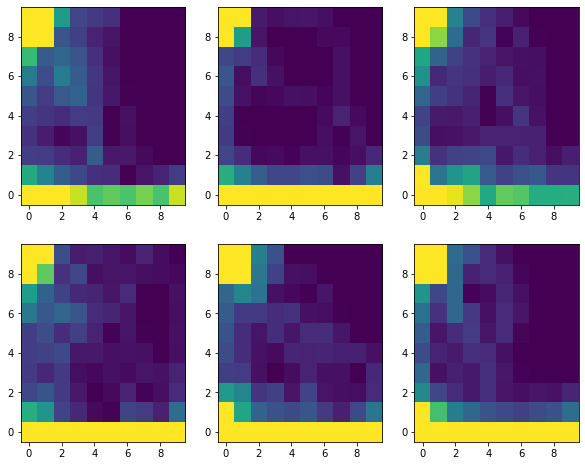

In [ ]:
map_plot(no_ff)

In [ ]:
def map_plot(dataframe):
    plt.figure(figsize=(10,8))
    plt.title('Heat map of agent in 50 tests')
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[50000:75000, 'Xposition']  # is a valid integer index and NAME is the name of the column.
        y = data.loc[50000:75000,'Yposition']
        #x = data['Xposition']#[(data['Grad_Temp']>0.4)]
        #y = data['Yposition']#[(data['Grad_Temp']>0.4)]
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(2, 3, i+1)
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 450,aspect= 'auto',interpolation='nearest')

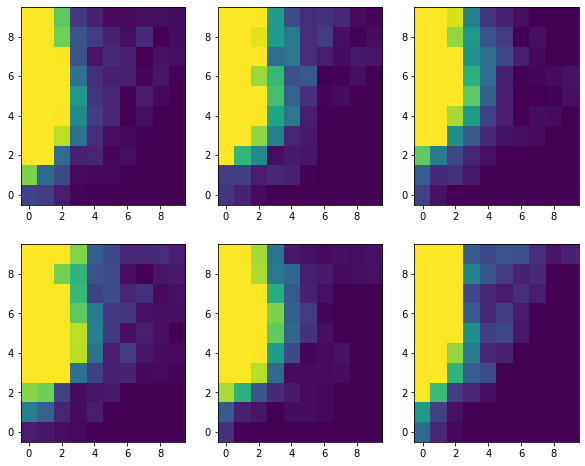

In [ ]:
map_plot(ff)

In [ ]:
def map_plot(dataframe):
    plt.figure(figsize=(10,8))
    plt.title('Heat map of agent in 50 tests')
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[20000:40000, 'Xposition']  # is a valid integer index and NAME is the name of the column.
        y = data.loc[20000:40000,'Yposition']
        #x = data['Xposition']#[(data['Grad_Temp']>0.4)]
        #y = data['Yposition']#[(data['Grad_Temp']>0.4)]
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(2, 3, i+1)
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 350,aspect= 'auto',interpolation='nearest')

In [ ]:
def map_plot():
    plt.figure(figsize=(6,6))
    plt.title('Heat map of agent in 50 tests during the whole simulation 100.000 timesteps')
    x = Xpose_av#[10000:25000] #high temp
    y = Ypose#[10000:25000]
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
    heatmap = heatmap.T
    plt.imshow(heatmap, origin='lower',vmin = 0, vmax = 3000, aspect= 'auto',interpolation='nearest')

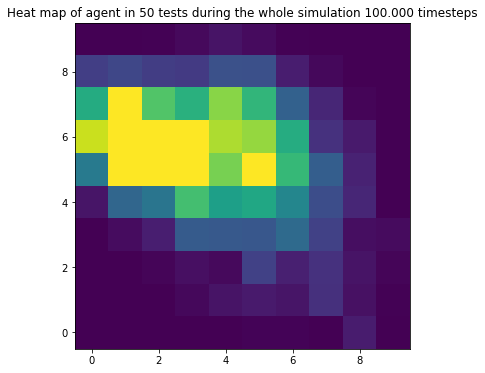

In [ ]:
map_plot()

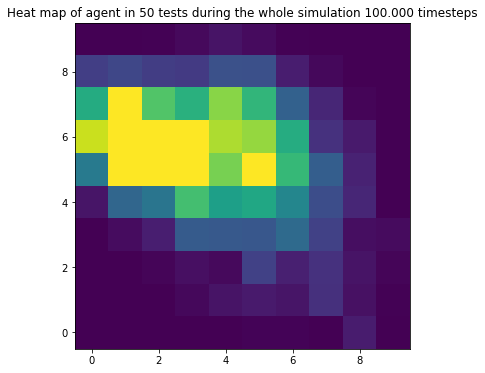

In [ ]:
map_plot()#high

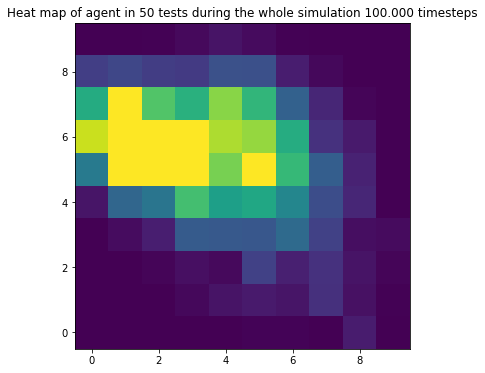

In [ ]:
map_plot()#low temp

In [ ]:
ff['data1']

,Xposition,Yposition,aVtemperature,aVthirst,Error_to_attractor,DriveThirst,TFtemperature,TFthirst,Smooth_error_temp,Thirst_error,Temperature_error,Grad_Temp,Output,Output_thirst
0,15.097488,64.124506,1.000,0.847,0.000,0.153,0.489502,0.749727,0.511969,0.153,0.000,0.427,0.000000,0.000000
1,15.819837,64.589559,1.000,0.846,0.000,0.154,0.572733,0.736803,0.511969,0.154,0.000,0.427,0.000000,0.000000
2,15.905727,65.123457,0.999,0.845,0.001,0.155,0.484483,0.757870,0.511969,0.155,0.001,0.427,0.000000,0.000000
3,16.056991,65.656887,0.998,0.844,0.002,0.156,0.410169,0.683240,0.511968,0.156,0.002,0.427,0.000000,0.000000
4,16.126369,66.960828,0.997,0.843,0.003,0.157,0.368775,0.656994,0.511968,0.157,0.003,0.427,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,110.961642,145.997315,0.000,0.958,1.000,0.042,0.806663,0.174648,0.699685,0.042,1.000,0.207,640.055278,185.296043
89996,111.290080,144.900829,0.000,0.957,1.000,0.043,0.837187,0.245331,0.699755,0.043,1.000,0.207,640.036977,185.286753
89997,111.647371,144.001832,0.000,0.956,1.000,0.044,0.778819,0.111428,0.699825,0.044,1.000,0.207,640.018695,185.277472
89998,112.754544,143.323793,0.000,0.955,1.000,0.045,0.763949,0.099164,0.699894,0.045,1.000,0.207,640.000431,185.268184


In [ ]:
Xpose_av, Xpose_std = mean_values(ff, 'Xposition')
Ypose, Ypose_std = mean_values(ff,'Yposition')

90000
90000


In [ ]:
def plot_trajectory(Xpose,Ypose):
    plt.figure(figsize=(8, 8))
    plt.plot(Xpose, Ypose, linewidth=0.3)
    plt.title('Agent trajectory', fontsize=20)
    plt.plot(Xpose[0],Ypose[0],'ro')
    plt.show()

In [ ]:
no_ffXpose_av, Xpose_std = mean_values(no_ff, 'Xposition')
no_ffYpose, Ypose_std = mean_values(no_ff,'Yposition')

90000
90000


In [ ]:
def trajectory_plot(dataframe ):
    plt.figure(figsize=(10,10))
    plt.suptitle('Trajectory of agent in 4 tests non-feedforward condition', fontsize=20)
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        dataX = data["Xposition"]
        dataY = data["Yposition"]
        plt.subplot(3, 2, i+1)
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.plot(dataX,dataY, linewidth = 0.2)
    plt.tight_layout()
        

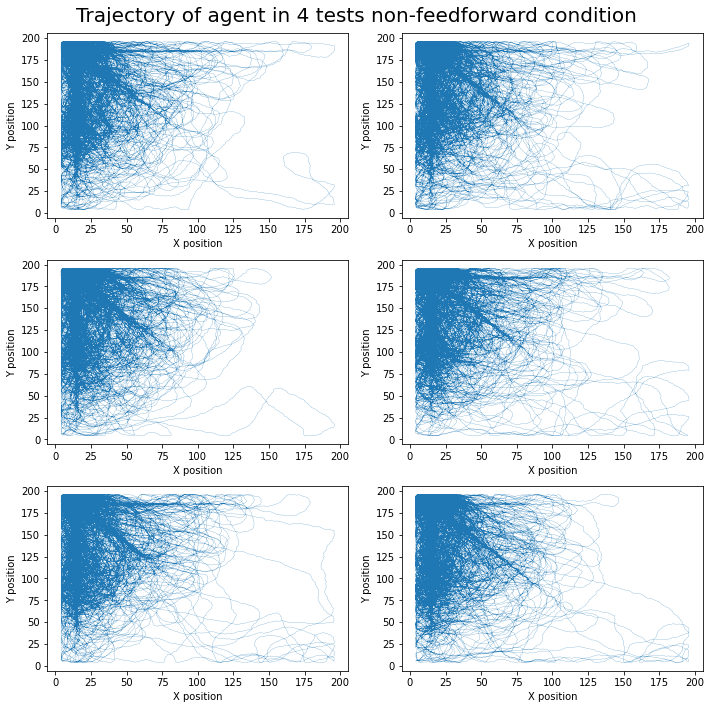

In [ ]:
trajectory_plot(ff)

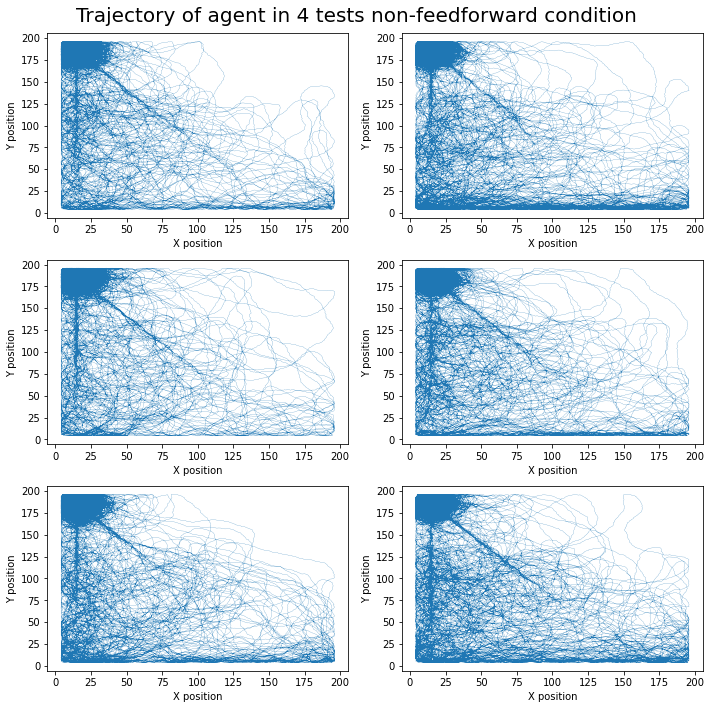

In [ ]:
trajectory_plot(no_ff)

In [ ]:
simulations = 25

In [ ]:
def trajectory_temperature(dataframe):
    plt.figure(figsize=(10,10))
    plt.suptitle('TRAJECTORY OF AGENT IN 4 TESTS NON-FEEDFORWARD CONDITION', fontsize=20)
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        ax = plt.subplot(3, 2, i+1)
        sns.lineplot(ax =ax, data = data, x = "Xposition",y= "Yposition", hue = "Grad_Temp", linewidth = 0.06, palette ="coolwarm" ,legend=False)
        
    plt.tight_layout()

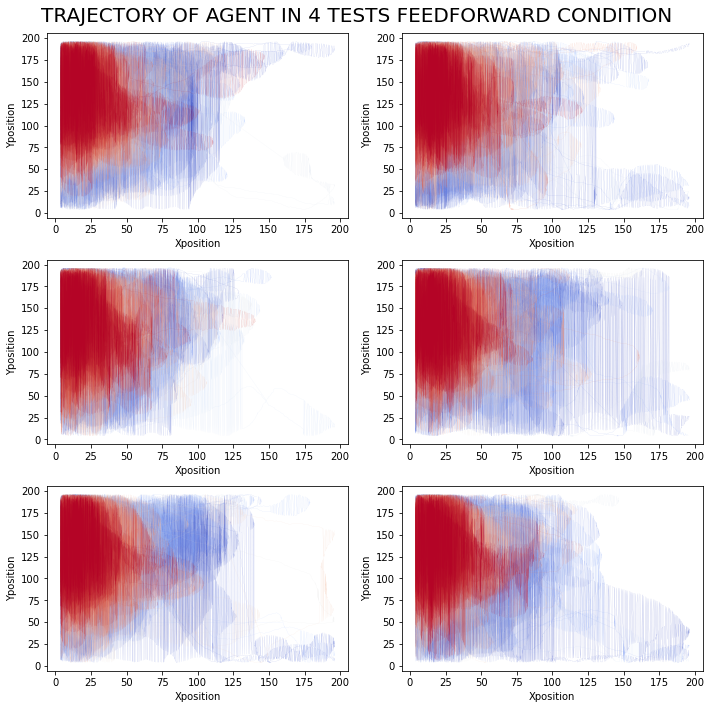

In [ ]:
trajectory_temperature(ff)

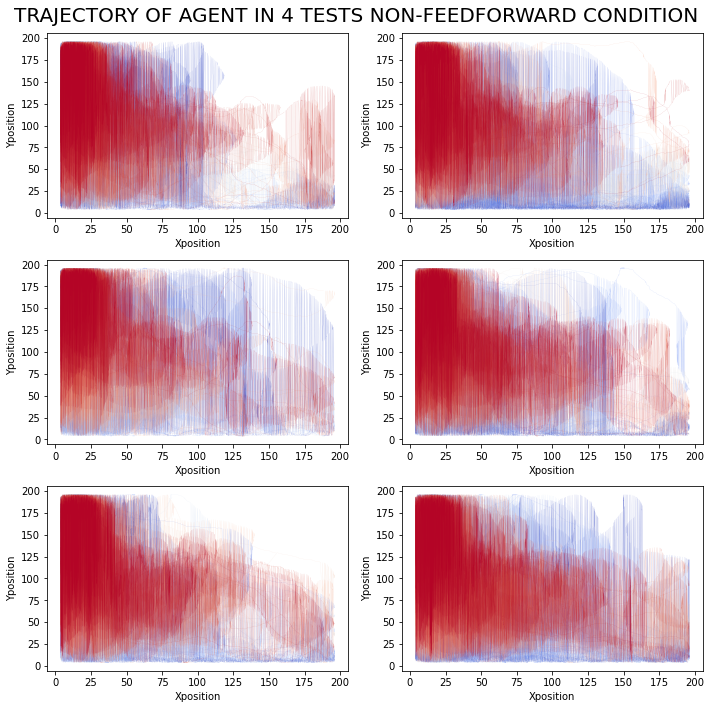

In [ ]:
trajectory_temperature(no_ff)

In [ ]:
trajectory_temperature(ff, 0.5)

TypeError: trajectory_temperature() takes 1 positional argument but 2 were given

# Heatmap

In [ ]:
def map_plot(dataframe):
    plt.figure(figsize=(8,8))
    plt.title('Heat map of agent in 50 tests')
    x = Xpose_av
    y = Ypose
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
    heatmap = heatmap.T
    plt.imshow(heatmap, origin='lower',vmin = 0, vmax = 2500, aspect= 'auto',interpolation='nearest')

In [ ]:
Xpos = ff["data1"][ff["data1"]["Grad_Temp"]<0.5]["Xposition"]
Ypos = ff["data1"][ff["data1"]["Grad_Temp"]<0.5]["Yposition"]

In [ ]:
print(np.mean(fferror_mean_temp))
np.mean(fferror_mean_thirst)
total_err_ff =np.mean(fferror_mean_temp)+np.mean(fferror_mean_thirst)

0.2779797055555556


In [ ]:
df = pd.read_csv("Results/testFF_temperrtimesfifty1.csv")

In [ ]:
temp_err = df["Temperature_error"]
thirst_err = df["Thirst_error"]
np.mean(temp_err),np.mean(thirst_err)

(0.7211258888888892, 0.03885829999999997)

In [ ]:
a =np.mean(temp_err)+np.mean(thirst_err)
a

0.7599841888888892

In [ ]:
df = pd.read_csv("Results/FF/testFF_doubleFFerroruptone1.csv")
df.head()

,Xposition,Yposition,aVtemperature,aVthirst,Error_to_attractor,DriveThirst,TFtemperature,TFthirst,Smooth_error_temp,Thirst_error,Temperature_error,Grad_Temp,Output,Output_thirst
0,79.973541,7.046407,1.0,0.0,0.0,1.0,1.261071,0.091234,0.427753,1.0,0.0,0.427,0.0,0.0
1,79.002803,7.583340,1.0,0.0,0.0,1.0,1.278124,0.106914,0.427753,1.0,0.0,0.427,0.0,0.0
2,77.989502,7.725018,1.0,0.0,0.0,1.0,1.344936,0.099312,0.427753,1.0,0.0,0.427,0.0,0.0
3,76.766465,7.919305,1.0,0.0,0.0,1.0,1.356281,0.100925,0.427753,1.0,0.0,0.427,0.0,0.0
4,76.378827,8.587282,1.0,0.0,0.0,1.0,1.273307,0.069156,0.427752,1.0,0.0,0.427,0.0,0.0


In [ ]:
df['Grad_Temp'].max()

0.8519999999999999

In [ ]:
df['Xposition'][(df['Grad_Temp']<0.4)]
#df[['Name','TotalMarks']][(df["Promoted"] == True)

30776    52.321236
30777    53.468788
30778    54.230924
30779    54.650232
30780    55.321537
           ...    
89995    29.409603
89996    30.216551
89997    31.348770
89998    31.879837
89999    33.223986
Name: Xposition, Length: 27675, dtype: float64

In [ ]:
gradient_position_list = np.cos(2*np.pi*np.arange(0,2*100000, 2)/100000)
#Scaling the sinusoidal signal from 0 to 130 -> min and max position of the gradient.
gradient_position_list = (gradient_position_list+1)*65
gradient_position_list

array([130.        , 129.99999949, 129.99999795, ..., 129.99999538,
       129.99999795, 129.99999949])

In [ ]:
gradient_position_list.min()

0.0

In [ ]:
gradient_position_list

array([130.        , 129.99999949, 129.99999795, ..., 129.99999538,
       129.99999795, 129.99999949])

In [ ]:
ratio_outputs =  mean_output_temp/mean_output_thirst 

C:\Users\vaorc\AppData\Local\Temp/ipykernel_26084/168473114.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_outputs =  mean_output_temp/mean_output_thirst


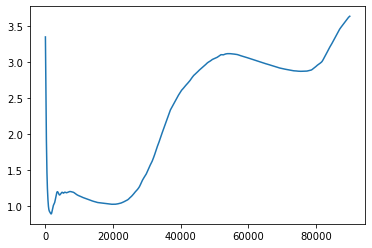

In [ ]:
plt.plot(ratio_outputs)

# FAIRNESS, STABILITY AND EFFICIENCY

In [ ]:
timesteps


90000

In [ ]:
def measurements(dataframe):
    mean_slot = 1000
    efficency = []
    fairness = []
    stability = []
    aVs_timestep = []
    dVs_timestep = []


    for i in range(int(timesteps/mean_slot)):
        SlotMeanTemp = []
        SlotMeanThirst = []
        for j in range(50):
            dict_name = 'data'+ str(j)
            SlotMeanTemp.append(statistics.mean(dataframe[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
            SlotMeanThirst.append(statistics.mean(dataframe[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
        efficency.append((statistics.mean(SlotMeanTemp)+statistics.mean(SlotMeanThirst))/2)

    for i in range(int(timesteps/mean_slot)):
        SlotMeanTemp = []
        SlotMeanThirst = []
        for j in range(simulations):
            dict_name = 'data'+ str(j)
            SlotMeanTemp.append(statistics.mean(dataframe[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
            SlotMeanThirst.append(statistics.mean(dataframe[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
        fairness.append(1-(abs(statistics.mean(SlotMeanTemp)-statistics.mean(SlotMeanThirst))))
        

    for i in range(len(dataframe[dict_name]['aVtemperature'])):
        current_timestep = []
        current_timestep.append(dataframe[dict_name]['aVtemperature'][i])
        current_timestep.append(dataframe[dict_name]['aVthirst'][i])
        aVs_timestep.append(current_timestep)
        dVs_timestep.append([1, 1])

        
    for i in range(int(timesteps/mean_slot)):
        stability.append(1-np.mean(np.array(dVs_timestep[mean_slot*i:mean_slot*(i+1)])-np.array(aVs_timestep[mean_slot*i:mean_slot*(i+1)])**2))
        
        
    return stability,fairness,efficency

In [ ]:
stability_ff, fairnes_ff, efficency_ff = measurements(ff)
stability,fairnes, efficency = measurements(no_ff)


In [ ]:
stability_ff, fairnes_ff, efficency_ff = [np.mean(i) for i in measurements(ff)]
stability_ff = np.mean(stability_ff)
fairnes_ff = np.mean(fairnes_ff)
efficency_ff=np.mean(efficency_ff)
stability = np.mean(stability)
fairnes= np.mean(fairnes)
efficency = np.mean(efficency)

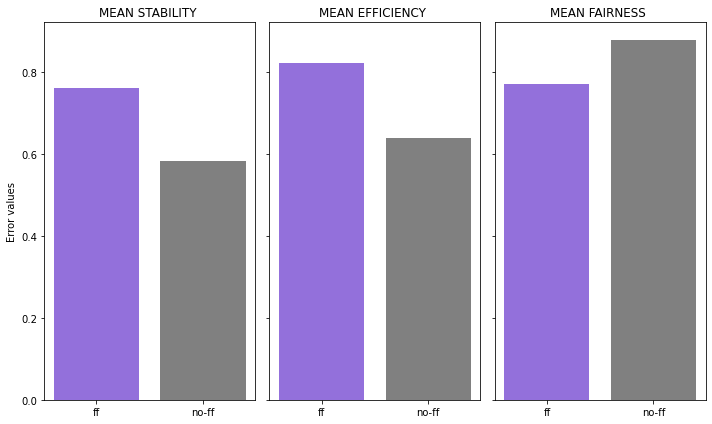

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols= 3,figsize=(10,6),sharey=True)

ax[0].bar(['ff', 'no-ff'],[stability_ff,stability], color =['mediumpurple','gray'])
ax[0].set_title('MEAN STABILITY ')
ax[0].set_ylabel('Error values')



ax[1].bar(['ff', 'no-ff'], [efficency_ff,efficency],  color =['mediumpurple','gray'])
ax[1].set_title('MEAN EFFICIENCY ')


ax[2].bar(['ff', 'no-ff'], [fairnes_ff,fairnes],  color =['mediumpurple','gray' ])
ax[2].set_title('MEAN FAIRNESS ')

plt.tight_layout()

In [ ]:
plt.bar(labels = ['Stability ff', 'Stability no-ff'], values = [stability_ff,stability])

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

In [ ]:
print(np.mean(stability), np.mean(fairnes), np.mean(efficency))
print(np.mean(stability_ff), np.mean(fairnes_ff), np.mean(efficency_ff))

0.581635311011111 0.9031606744444444 0.6406563729999998
0.7670881337888887 0.7782733584444443 0.8224545587777776


In [ ]:
external_temp = []
for i in range(int(timesteps/1000)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(50):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(statistics.mean(no_ff[dict_name]['Grad_Temp'][1000*i:1000*(i+1)]))
    external_temp.append(statistics.mean(SlotMeanTemp))

In [ ]:
len(efficency_ff)

90

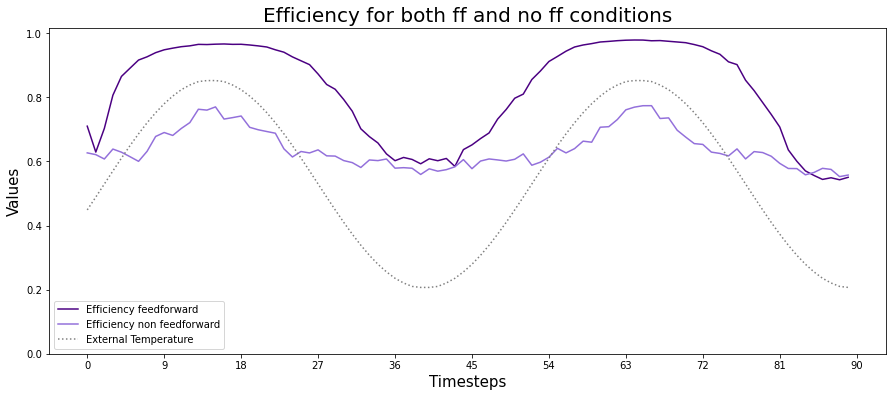

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(efficency_ff, label='Efficiency feedforward', color="indigo")
plt.plot(efficency, label='Efficiency non feedforward', color="mediumpurple")
plt.plot(external_temp, label='External Temperature', color="gray",linestyle = 'dotted')
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/1000/10))
plt.ticklabel_format(axis="x", style="sci", useOffset=False)# scilimits=(0,0)
plt.title('Efficiency for both ff and no ff conditions', fontsize=20)
plt.ylabel('Values', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

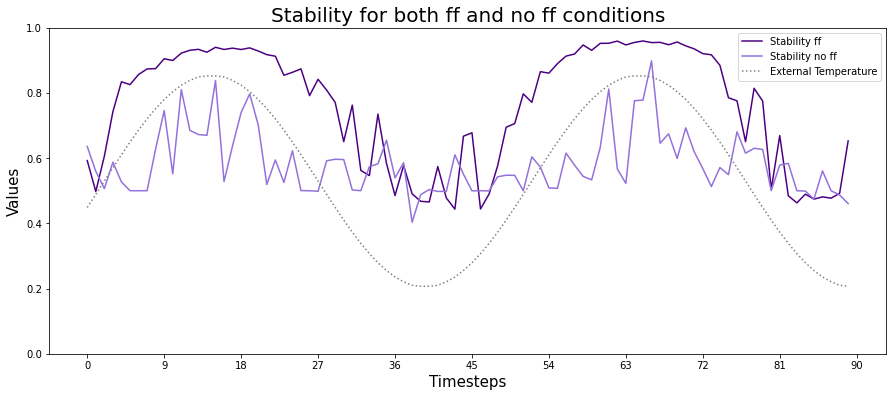

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(stability_ff, label='Stability ff', color="indigo")
plt.plot(stability, label='Stability no ff', color="mediumpurple")
plt.plot(external_temp, label='External Temperature', color="gray",linestyle = 'dotted')
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/1000/10))
plt.ticklabel_format(axis="x", style="sci",useOffset=False)
plt.title('Stability for both ff and no ff conditions', fontsize=20)
plt.ylabel('Values', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

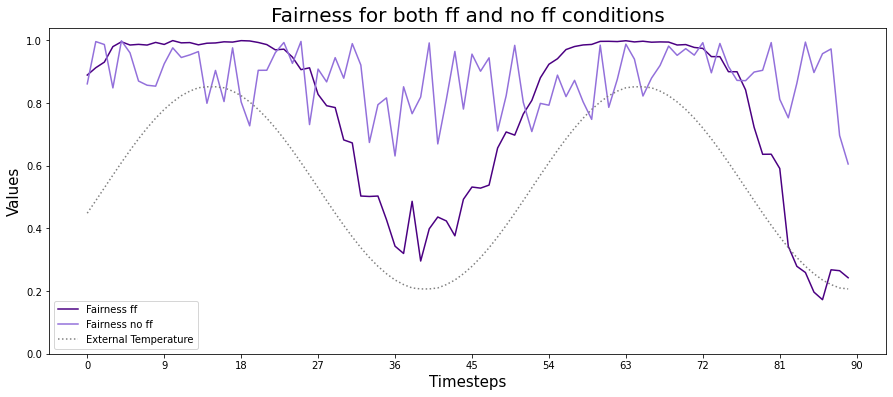

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(fairnes_ff, label='Fairness ff', color="indigo")
plt.plot(fairnes, label='Fairness no ff', color="mediumpurple")
plt.plot(external_temp, label='External Temperature', color="gray",linestyle = 'dotted')
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/1000/10))
plt.ticklabel_format(axis="x", style="sci", useOffset=False)
plt.title('Fairness for both ff and no ff conditions', fontsize=20)
plt.ylabel('Values', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

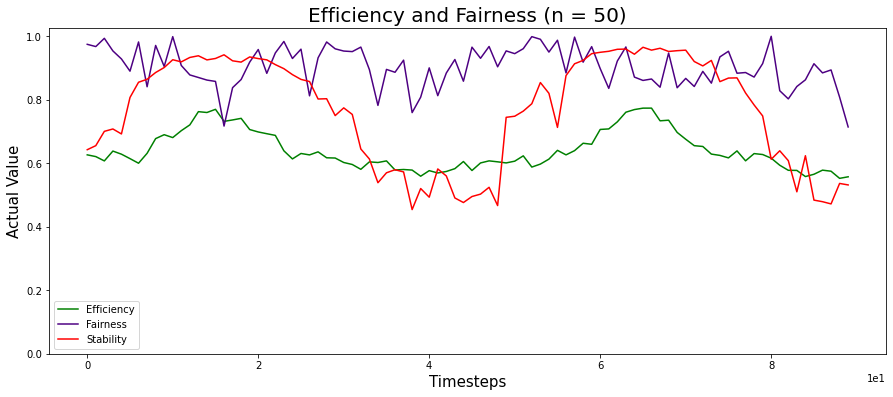

In [ ]:
fig = plt.figure(figsize=(15, 6))
mean_slot = 1000
plt.plot(efficency_ff, label='Efficiency', color="Green")
plt.plot(fairnes_ff, label='Fairness', color="#4d0082")
plt.plot(stability_ff, label='Stability', color="Red")

#plt.xticks(np.arange(0, timesteps/mean_slot+1, step=timesteps/mean_slot/10))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Efficiency and Fairness (n = 50)', fontsize=20)
plt.ylabel('Actual Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

In [ ]:
import statistics 

In [ ]:
mean_slot =1000

def find_fairness(dataframe):
    disparity = []
    for i in range(int(timesteps/mean_slot)):
        SlotMeanTemp = []
        SlotMeanThirst = []
        for j in range(simulations):
            dict_name = 'data'+ str(j)
            SlotMeanTemp.append(statistics.mean(dataframe[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
            SlotMeanThirst.append(statistics.mean(dataframe[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
        disparity.append(1-(abs(statistics.mean(SlotMeanTemp)-statistics.mean(SlotMeanThirst))))
    return disparity

In [ ]:
def find_fairness(dataframe):
        disparity = []
        SlotMeanTemp = []
        SlotMeanThirst = [] 
        for i in range(90000):
                for i in range(50):
                        dict_name = 'data'+ str(i)
                        data_temp = dataframe[dict_name]['aVtemperature']
                        data_thirst = dataframe[dict_name]['aVthirst']
                        SlotMeanTemp.append(data_temp)
                        SlotMeanTemp_np = np.array(SlotMeanTemp)
                        mean_disparity_temp = np.mean(SlotMeanTemp_np, axis= 0)
                        SlotMeanThirst.append(data_thirst)
                        SlotMeanThirst_np = np.array(SlotMeanThirst)
                        mean_disparity_thirst = np.mean(SlotMeanThirst_np, axis= 0)      
        disparity.append(1-(abs(statistics.mean(mean_disparity_temp)-statistics.mean(mean_disparity_thirst))))
        print(len(disparity))
        return disparity

In [ ]:
fairnes_ff = find_fairness(ff)
fairness_no_ff = find_fairness(no_ff)

KeyboardInterrupt: 

In [ ]:
fairnes_ff

[0.7800594686666666]

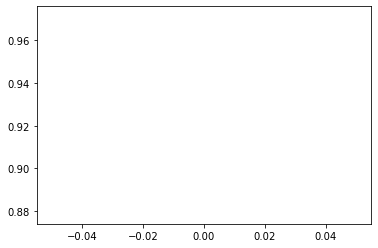

In [ ]:
plt.plot(fairness_no_ff)

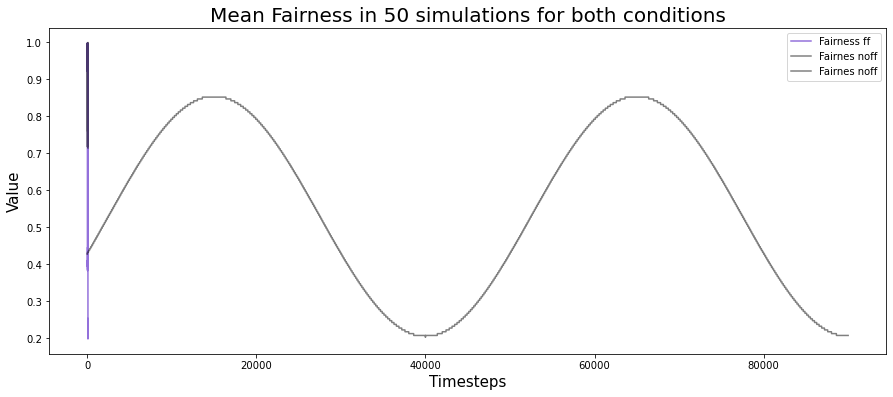

In [ ]:
fig = plt.figure(figsize=(15, 6))

plt.plot(fairnes_ff, label='Fairness ff', color="mediumpurple")
plt.plot(fairness_no_ff, label='Fairnes noff', color="black", alpha = 0.5)
plt.plot(noffmean_externaltemp, label='Fairnes noff', color="black", alpha = 0.5)

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Mean Fairness in 50 simulations for both conditions', fontsize=20)
plt.ylabel('Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
#plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show() 

In [ ]:
fno =np.mean(fairness_no_ff)
fff= np.mean(fairnes_ff)
fno,fff

(0.9031606744444444, 0.7782733584444443)

In [ ]:
df = pd.read_csv('Results/FF/testFF_doubleFFweightuptonelreight1.csv')

In [ ]:
df.head()

,Xposition,Yposition,aVtemperature,aVthirst,Error_to_attractor,DriveThirst,TFtemperature,TFthirst,Smooth_error_temp,Thirst_error,Temperature_error,Grad_Temp,Output,Output_thirst
0,10.140565,175.917125,0.0,1.0,1.0,0.0,0.031216,0.823253,0.585415,0.0,1.0,0.427,0.0,0.0
1,10.255766,177.203746,0.0,1.0,1.0,0.0,0.023243,0.895730,0.585515,0.0,1.0,0.427,0.0,0.0
2,10.477653,178.304333,0.0,1.0,1.0,0.0,-0.000000,0.891384,0.585615,0.0,1.0,0.427,0.0,0.0
3,11.081729,179.101721,0.0,1.0,1.0,0.0,-0.000000,0.873242,0.585715,0.0,1.0,0.427,0.0,0.0
4,11.253581,179.882276,0.0,1.0,1.0,0.0,0.001228,0.940573,0.585814,0.0,1.0,0.427,0.0,0.0
